In [ ]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras.datasets import fashion_mnist

## Data Preparation

In [ ]:
%%capture
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

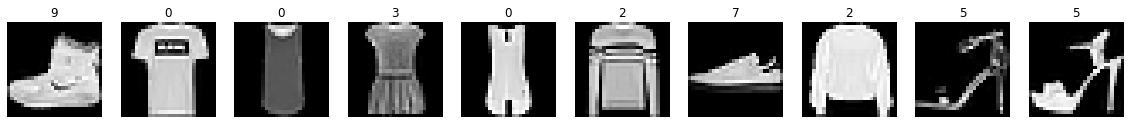

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(train_data[i], cmap='gray')
    ax.set_axis_off()
    ax.set_title(train_labels[i])

In [ ]:
# Normalization
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
train_data_v = train_data.reshape(len(train_data), 784)
test_data_v = test_data.reshape(len(test_data), 784)

In [ ]:
train_data_v.shape

(60000, 784)

## Model Design

In [ ]:
model = Sequential(
    [
     layers.Input(shape=(784,)),
     layers.Dense(128, activation='relu'),
     layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training

In [ ]:
from tensorflow.keras import losses, optimizers

model.compile(loss=losses.sparse_categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

## Callbacks

In [ ]:
from tensorflow.keras import callbacks

checkpoint = callbacks.ModelCheckpoint('model_checkpoint.keras',
                                       monitor='val_loss',
                                       save_best_only=True)
logger = callbacks.CSVLogger('log.csv')

callbacks = [checkpoint, logger]

In [ ]:
history = model.fit(train_data_v, train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)


In [ ]:
model.save('model.keras')

In [ ]:
from tensorflow.keras.models import load_model

model2 = load_model('model.keras')

## Evaluation

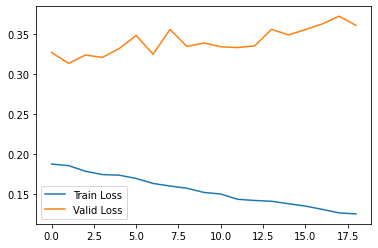

In [ ]:
plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Valid Loss')
plt.legend()

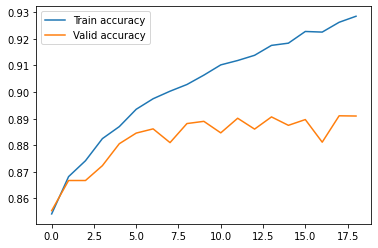

In [ ]:
plt.plot(history.history['accuracy'][1:], label='Train accuracy')
plt.plot(history.history['val_accuracy'][1:], label='Valid accuracy')
plt.legend()

In [ ]:
model2.evaluate(test_data_v, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3410 - accuracy: 0.8847


[0.341020792722702, 0.8847000002861023]

In [ ]:
preds = model.predict(test_data_v)

In [ ]:
class_names = {0: 'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker'}

Predicted label: T-shirt/top
True label: Shirt


(-0.5, 27.5, 27.5, -0.5)

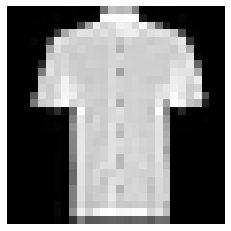

In [ ]:
import numpy as np

img_id = 40
print(f'Predicted label: {class_names[np.argmax(preds[img_id])]}')
print(f'True label: {class_names[test_labels[img_id]]}')

plt.imshow(test_data[img_id], cmap='gray')
plt.axis('off')